A. Daily attendance of bike tracks
every row contains the number of bicycles on every track of the city(montreal), 
for every day of the year.
Can you infer anything from the attendence record?

1. Read 
2. Check head 
3. Check summary statistics 
4. plot the daily attendance of two tracks, 'Berri1', 'PierDup'
5. Check index , explore weekday_name attributes 
6. Get sum of all attendance as a function of the weekday
7. Display this in figure , what is the inference?



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url = r"C:\Users\Shireesha\Downloads\ToBeShared\ToBeShared\code\data\bikes.csv"
#1.1)Read
bikes = pd.read_csv(url)

In [2]:
#1.2)Check head
bikes.head()

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0


In [3]:
#1.3)Check summary statistics
bikes.describe()


,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


Text(0.5, 1.0, "Daily attendance of two tracks, 'Berri1', 'PierDup'")

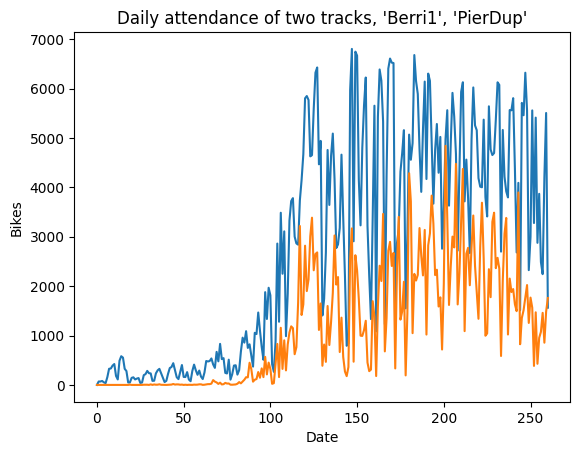

In [4]:
#1.4)plot the daily attendance of two tracks, 'Berri1', 'PierDup'
plt.plot(bikes[['Berri1','PierDup']])
plt.xlabel('Date')
plt.ylabel('Bikes')
plt.title("Daily attendance of two tracks, 'Berri1', 'PierDup'")

In [5]:
#5)Check index , explore weekday_name attributes
bikes['weekday_name'] = pd.to_datetime(bikes.Date,dayfirst=True).dt.day_name()

In [6]:
bikes

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier,weekday_name
0,01/01/2013,00:00,0,0,1,0,6,0,1,0,Tuesday
1,02/01/2013,00:00,69,0,13,0,18,0,2,0,Wednesday
2,03/01/2013,00:00,69,2,21,6,22,1,0,0,Thursday
3,04/01/2013,00:00,80,0,22,4,16,0,125,0,Friday
4,05/01/2013,00:00,52,4,19,3,12,0,97,0,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
256,14/09/2013,00:00,2488,1494,1706,2911,979,1075,3277,2456,Saturday
257,15/09/2013,00:00,2243,1749,1417,2933,1804,1459,3623,2527,Sunday
258,16/09/2013,00:00,4206,2466,2799,5485,3272,855,4307,3012,Monday
259,17/09/2013,00:00,5506,3153,3563,6626,3882,1485,5332,3745,Tuesday


In [7]:
#1.6)Get sum of all attendance as a function of the weekday
weekday_attendance = bikes.groupby('weekday_name')
weekday_attendance = weekday_attendance.sum(numeric_only=True)
weekday_attendance

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
weekday_name,,,,,,,,
Friday,105701,44252,71605,127526,64385,36850,118556,71426
Monday,106826,51646,68087,129982,69767,44500,119211,72883
Saturday,75754,27226,45947,79743,35544,46149,97143,56438
Sunday,74873,29181,40812,75746,37620,53812,100735,53798
Thursday,115193,52340,76273,141424,73668,36349,120684,74540
Tuesday,117244,54656,76974,141217,74299,40679,123533,76559
Wednesday,120434,59604,79033,145860,80437,42564,125173,79501


Inference from the weekday attendance plot:
*The highest bicycle attendance across all tracks is observed on weekdays, particularly Tuesday, Wednesday, and Thursday.
*Weekend attendance (Saturday and Sunday) is  lower compared to weekdays.
* Bike track usage is more in weekdays than week-ends.


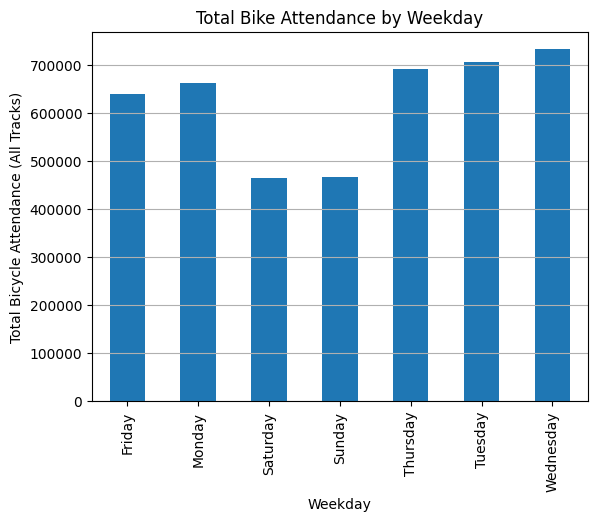

In [8]:
##1.7)Display this in figure , what is the inference?
tracks_to_sum = [col for col in weekday_attendance.columns ]
weekday_attendance_sum = weekday_attendance[tracks_to_sum].sum(axis=1)
weekday_attendance_sum.plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Total Bicycle Attendance (All Tracks)')
plt.title('Total Bike Attendance by Weekday')
plt.grid(axis='y')
print("Inference from the weekday attendance plot:")
print("*The highest bicycle attendance across all tracks is observed on weekdays, particularly Tuesday, Wednesday, and Thursday.")
print("*Weekend attendance (Saturday and Sunday) is  lower compared to weekdays.")
print("* Bike track usage is more in weekdays than week-ends.")

B. Titanic-https://www.kaggle.com/c/titanic/data
Database of whether somebody survived or not
Can you infer who has survived ?

1. Load the data
2. Which gender survived more 
3. Does it depend on pclass?
4. can we see % of survival of each gender and pclass 
What is your inference? 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
path = r"C:\Users\Shireesha\Downloads\ToBeShared\ToBeShared\code\data\titanic_train.csv"
#2.1)Load the data
titanic = pd.read_csv(path)

In [10]:
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
#2.2)Which gender survived more
survival_more = titanic.groupby('sex')
survival_more['survived'].sum().idxmax()

'female'

In [12]:
#2.3)Does it depend on pclass?
survival_depend = titanic[['survived','pclass']]
survival_depend1 = survival_depend.corr()
survival_depend1
#not depend on pclass because value is negative

,survived,pclass
survived,1.000000,-0.338481
pclass,-0.338481,1.000000


Text(0.5, 1.0, 'Survival Rate by Gender')

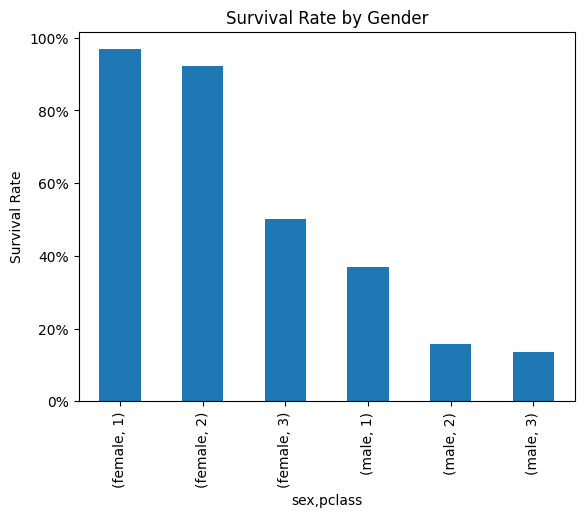

In [13]:
#2.4)can we see % of survival of each gender and pclass What is your inference?
data = titanic.groupby(['sex','pclass'])['survived']
graph = data.mean().plot(kind = 'bar')
plt.yticks([0,0.2,0.4,0.6,0.8,1], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender')
#yes we can see,females had a much higher percentage of survival than males across all pclass

C. Roger Federer database 

Each row corresponds to a ATP match played by Roger Federer

Can you infer anything on Roger Federer performance?

player = 'Roger Federer'
url = "https://raw.githubusercontent.com/ndas1971/Misc/master/federer.csv"

1. Read and check data 
2. How many % of matched won by our player? ('winner')
3. Proportion of double faults wrt total points in each match 
This number is an indicator of the player's state of mind, his level of self-confidence, 
his willingness to take risks while serving, and other parameters.
columns:
'player1 double faults' and 'player1 total points total'
Display simple stats of above 
4. Average Win per surface 
5. Display the proportion of double faults as a function of the tournament date, 'start date'
Trend: display average double faults in each year 

In [14]:
url = r"C:\Users\Shireesha\Downloads\ToBeShared\ToBeShared\code\data\federer.csv"
#3.1)read data
federer = pd.read_csv(url)
federer

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",05.10.1998,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0
3,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,28.0,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0
4,1998,"Geneva, Switzerland",24.08.1998,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2012,"Australian Open, Australia",16.01.2012,GS,Outdoor: Hard,Draw: 128,720,3.0,"A$437,000",S,...,49.0,6.0,16.0,21.0,95.0,141.0,51.0,135.0,146.0,276.0
1175,2012,"Doha, Qatar",02.01.2012,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R32,...,6.0,0.0,0.0,8.0,22.0,45.0,9.0,41.0,31.0,86.0
1176,2012,"Doha, Qatar",02.01.2012,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",R16,...,17.0,0.0,2.0,9.0,28.0,50.0,11.0,49.0,39.0,99.0
1177,2012,"Doha, Qatar",02.01.2012,250,Outdoor: Hard,Draw: 32,90,3.0,"$50,030",Q,...,29.0,4.0,9.0,16.0,47.0,78.0,34.0,95.0,81.0,173.0


In [15]:
#checking od data
federer.head()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",05.10.1998,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0
3,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,28.0,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0
4,1998,"Geneva, Switzerland",24.08.1998,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
federer.describe()

,year,atp ranking,time,player1 aces,player1 double faults,player1 1st serves in,player1 1st serves total,player1 1st serve points won,player1 1st serve points total,player1 2nd serve points won,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
count,1179.000000,1177.000000,1179.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,2005.822731,15.402719,88.014419,7.658228,1.972736,48.074976,78.050633,36.891918,48.074976,16.935735,...,29.975657,1.515093,4.582278,12.798442,49.671860,82.675755,24.245375,78.050633,73.917235,160.726388
std,3.893527,61.331354,50.208925,4.791261,1.927344,17.828652,28.282779,13.340020,17.828652,6.512229,...,12.366416,1.666818,4.072658,4.167927,20.230553,29.701783,12.214704,28.282779,30.274990,56.441072
min,1998.000000,1.000000,0.000000,0.000000,0.000000,3.000000,5.000000,2.000000,3.000000,2.000000,...,2.000000,0.000000,0.000000,1.000000,1.000000,9.000000,1.000000,5.000000,2.000000,14.000000
25%,2003.000000,1.000000,63.000000,4.000000,1.000000,35.500000,57.000000,27.000000,35.500000,12.000000,...,21.000000,0.000000,1.000000,10.000000,35.000000,61.000000,15.000000,57.000000,51.000000,118.000000
50%,2006.000000,2.000000,86.000000,7.000000,1.000000,45.000000,73.000000,35.000000,45.000000,16.000000,...,27.000000,1.000000,4.000000,12.000000,46.000000,78.000000,22.000000,73.000000,68.000000,150.000000
75%,2009.000000,6.000000,116.000000,10.000000,3.000000,57.000000,93.000000,44.000000,57.000000,21.000000,...,37.000000,2.000000,7.000000,15.000000,61.500000,99.000000,31.000000,93.000000,92.000000,191.500000
max,2012.000000,878.000000,305.000000,50.000000,12.000000,127.000000,197.000000,113.000000,127.000000,48.000000,...,88.000000,11.000000,26.000000,37.000000,171.000000,239.000000,86.000000,197.000000,213.000000,436.000000


In [17]:
#3.2)How many % of matched won by our player? ('winner')
player = 'Roger Federer'
matches_won = federer[federer['winner'] == player].shape[0]
print(matches_won)
total_matches = federer.shape[0]
print(total_matches)
win_percentage = (matches_won / total_matches) * 100
print(win_percentage)

972
1179
82.44274809160305


In [18]:
x  = federer["winner"] == "Roger Federer"
x.value_counts()[True]

972

In [19]:
#3.3)Proportion of double faults wrt total points in each match 
#This number is an indicator of the player's state of mind, his level of self-confidence, 
#his willingness to take risks while serving, and other parameters.columns:
#'player1 double faults' and 'player1 total points total'
#Display simple stats of above 
federer['proportion'] = federer['player1 double faults'] /federer['player1 total points total']
print(federer['proportion'])
federer['proportion'].describe()

0       0.019417
1       0.000000
2       0.020270
3       0.046154
4            NaN
          ...   
1174    0.018116
1175    0.000000
1176    0.000000
1177    0.011561
1178         NaN
Name: proportion, Length: 1179, dtype: float64


count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: proportion, dtype: float64

In [20]:
#3.4)Average Win per surface
player = 'Roger Federer'
total_surface_matches = federer['surface'].value_counts()
total_won_matches = federer[federer['winner'] == player]
surface_won_matches = total_won_matches['surface'].value_counts()
win_percent = (surface_won_matches / total_surface_matches)*100
#print(total_surface_matches)
#print(surface_won_matches)
print(win_percent)

surface
Outdoor: Hard     84.232365
Outdoor: Clay     77.911647
Indoor: Hard      83.628319
Outdoor: Grass    87.142857
Indoor: Carpet    73.684211
Indoor: Clay      83.333333
Name: count, dtype: float64


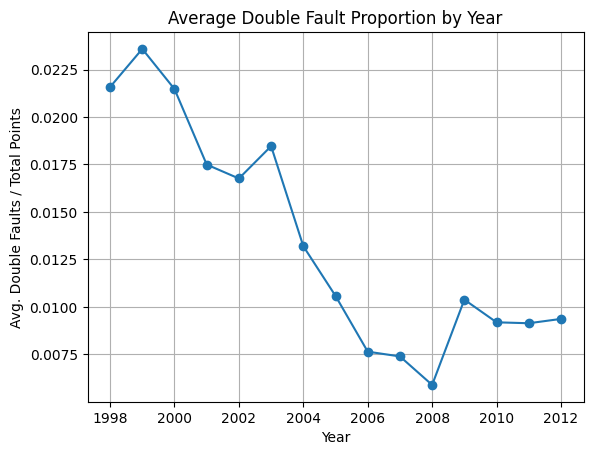

In [21]:
#3.5)Display the proportion of double faults as a function of the tournament date, 'start date' 
#Trend: display average double faults in each year
federer['start date'] = pd.to_datetime(federer['start date'], dayfirst=True)
federer['year'] = federer['start date'].dt.year
federer['proportion'] = federer['player1 double faults'] /federer['player1 total points total']
avg_double_fault_proportion = federer.groupby('year')['proportion'].mean()
plt.plot(avg_double_fault_proportion.index, avg_double_fault_proportion.values, marker='o')
plt.title("Average Double Fault Proportion by Year")
plt.xlabel("Year")
plt.ylabel("Avg. Double Faults / Total Points")
plt.grid(True)


4)Create two frequencies 5Hz and 50Hz sin signals 
Draw FFT components 

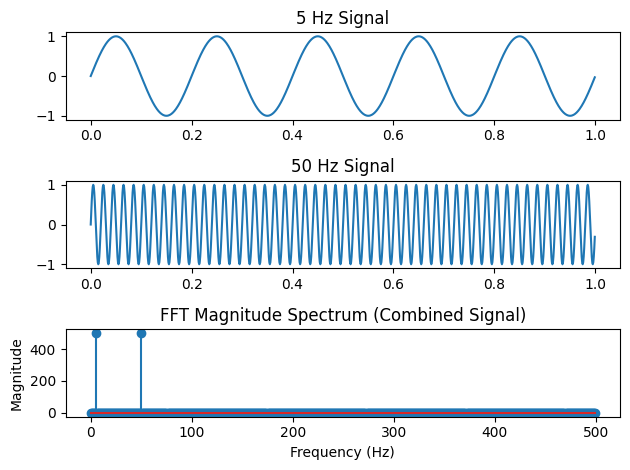

In [39]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1000  # Sampling frequency
t = np.linspace(0, 1, Fs, endpoint=False)
signal1 = np.sin(2 * np.pi * 5 * t)   # 5 Hz
signal2 = np.sin(2 * np.pi * 50 * t)  # 50 Hz

combined_signal = signal1 + signal2

fft_vals = np.fft.fft(combined_signal)
fft_freqs = np.fft.fftfreq(len(t), 1/Fs)

half_n = Fs // 2
fft_magnitude = np.abs(fft_vals[:half_n])
frequencies = fft_freqs[:half_n]

mag_5Hz = fft_magnitude[np.where(frequencies == 5)[0][0]]
mag_50Hz = fft_magnitude[np.where(frequencies == 50)[0][0]]

plt.subplot(3, 1, 1)
plt.plot(t, signal1)
plt.title("5 Hz Signal")

plt.subplot(3, 1, 2)
plt.plot(t, signal2)
plt.title("50 Hz Signal")

plt.subplot(3, 1, 3)
plt.stem(frequencies, fft_magnitude)
plt.title("FFT Magnitude Spectrum (Combined Signal)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()

5)Plotting normal random numbers
and show that addition of two Gaussian is Gaussian 
and addition of all is Gaussian


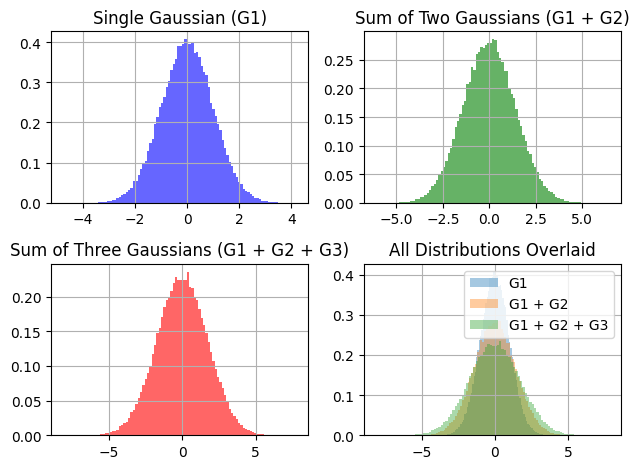

In [38]:
import numpy as np
import matplotlib.pyplot as plt
samples = 100000
g1 = np.random.normal(loc=0, scale=1, size=samples)
g2 = np.random.normal(loc=0, scale=1, size=samples)
g3 = np.random.normal(loc=0, scale=1, size=samples)

# Sum of two Gaussians
g12 = g1 + g2

# Sum of all three
g123 = g1 + g2 + g3

# Individual
plt.subplot(2, 2, 1)
plt.hist(g1, bins=100, density=True, alpha=0.6, color='blue', label='G1')
plt.title('Single Gaussian (G1)')
plt.grid(True)

# Sum of two
plt.subplot(2, 2, 2)
plt.hist(g12, bins=100, density=True, alpha=0.6, color='green', label='G1 + G2')
plt.title('Sum of Two Gaussians (G1 + G2)')
plt.grid(True)

# Sum of all three
plt.subplot(2, 2, 3)
plt.hist(g123, bins=100, density=True, alpha=0.6, color='red', label='G1 + G2 + G3')
plt.title('Sum of Three Gaussians (G1 + G2 + G3)')
plt.grid(True)

# All together
plt.subplot(2, 2, 4)
plt.hist(g1, bins=100, density=True, alpha=0.4, label='G1')
plt.hist(g12, bins=100, density=True, alpha=0.4, label='G1 + G2')
plt.hist(g123, bins=100, density=True, alpha=0.4, label='G1 + G2 + G3')
plt.title('All Distributions Overlaid')
plt.legend()
plt.grid(True)
plt.tight_layout()
